<a href="https://colab.research.google.com/github/kdominiaq/OpenCV-For-Beginners-Course/blob/main/Kopia_notatnika_01_02_Color_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:30px;">Color Images</h1>

In this module, we will cover the most fundamental concepts associated with color images. These include color spaces, color channels, and some practical considerations associated with reading and displaying color images. 

* Reading and Displaying Color Images
* Splitting and Merging Color Channels
* Converting to Different Color Spaces
* Saving Images [recap]

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/8mu8erfnvqk3dzu/AABWmDJkjv-TvECMPRKlufNYa?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

module-code.zip     100%[===================>]  31.27M  26.4MB/s    in 1.2s    
mapname:  conversion of  failed


# 1. Reading and Displaying Color Images
Until now, we have been using grayscale images in our discussion. Let's now start working with color images. We will begin by reading and displaying color images in two different formats.  We will also discuss some of the unexpected results that can occur. 

# 1.1 Example: Facebook Logo (JPG)

We will start with a simple color image below of the Facebook logo in a JPG format.

![c0-m1-Facebook-logo.jpg](https://opencv.org/wp-content/uploads/2021/08/c0-m1-Facebook-logo.jpg)

### <font style="color:rgb(50,120,230)">Read JPG image and print the shape and data type</font>
Color images are typically represented using three separate "color" channels. The specific color channels used to represent a color image depend on the Color Space. One of the most common color spaces is the RGB color space, which contains Red, Green, and Blue channels. 

In [ ]:
# Read the image.
logo = 'facebook_logo.jpg'
logo_img = cv2.imread(logo, cv2.IMREAD_COLOR)

# Print the size of the image.
print("Image size is ", logo_img.shape)

Image size is  (301, 800, 3)


### <font style="color:rgb(50,120,230)">Display the image</font>

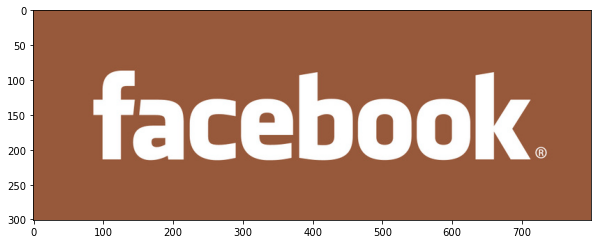

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(logo_img);

### <font style="color:rgb(50,120,230)">What happened to the color?</font>

The color displayed above is different from the actual image. This is because matplotlib expects the image to be in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channel order of the image in order to properly render the color of the image.

### <font style="color:rgb(50,120,230)">Swap the Red and Blue channels</font>
There are a couple of different approaches to reversing the order of the color channels. The first approach shown below uses a short-hand NumPy array slicing syntax that will reverse the order of the channels in the 3rd dimension of the image array.

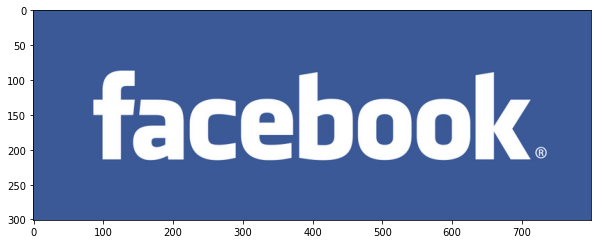

In [ ]:
# Swap the Red and Blue color channels.
logo_img = logo_img[:, :, ::-1]

# Display the image.
plt.figure(figsize = (10, 10))
plt.imshow(logo_img);

## 1.2 Example : PyTorch Logo (PNG)

Let's now take a look at a PNG image of the PyTorch logo.

![c0-m1-Pytorch-logo.png](https://opencv.org/wp-content/uploads/2021/08/c0-m1-Pytorch-logo.png)

### <font style="color:rgb(50,120,230)">Read and display a PNG image </font>

Image size is  (205, 1025, 3)


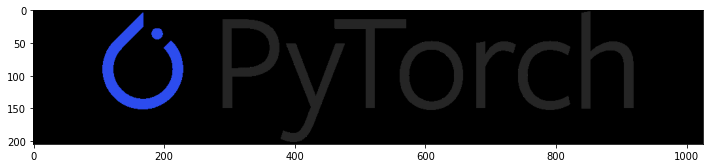

In [ ]:
# Read the image.
logo = 'Pytorch_logo.png'

# Png format has fourth channel which is alpha, when the image has been read with cv2.IMREAD_COLOR format. This channel is removed. 
# So white color will be change by black.
logo_img = cv2.imread(logo, cv2.IMREAD_COLOR)

# Print the size of the image.
print("Image size is ", logo_img.shape)

# Display the image.
plt.figure(figsize = (12, 12))
plt.imshow(logo_img);

### <font style="color:rgb(50,120,230)">What happened?</font>

The color channels need to be swapped as in the previous example, but there is also a black background that was unexpected.

### <font style="color:rgb(50,120,230)">Use cv2.IMREAD_UNCHANGED to read the image with the alpha channel</font>
PNG images support a 4th channel called the "alpha" channel. The alpha channel contains transparency information that allows specific regions within an image to appear transparent. As an example, consider the Facebook logo in the previous section. The logo contains two colors (blue and white). The white letters in the logo are actually white: `(255, 255, 255)`. The PyTorch logo, on the other hand, contains an alpha channel that allows certain regions of the image to appear transparent. So the "white" background is not white. Instead, those pixels are being masked by a 4th (alpha) channel, and are interpreted as transparent. In this case the pixels in the background portion of the image are set to: `(0,0,0)`, which will appear as black unless we include the alpha chanel to mask them. **We will cover transparency and alpha masking in a future module in more detail, but it is important to be aware of these details when reading and displaying images.**

(205, 1025, 4)


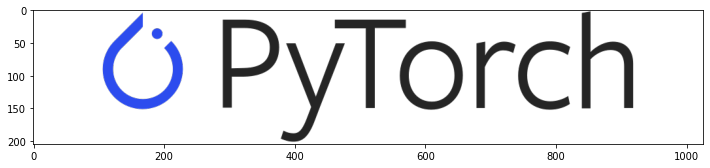

In [ ]:
# Read the image.
logo = "Pytorch_logo.png"

# Allows to read all channels (the fourth also) -> background will be white, by logo still is not correct.
logo_img = cv2.imread(logo, cv2.IMREAD_UNCHANGED)

# Print the size of the image.
print(logo_img.shape)

# Display the image.
plt.figure(figsize = (12, 12))
plt.imshow(logo_img);


<hr style="border:none; height: 4px; background-color:#D3D3D3" />

**`cvtColor()`** Converts an image from one color space to another. Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. This function can be used to simply swap the order of the Blue and Red channels for the RGB color space, but it can also be used to convert between color spaces as we will see further below.

### <font color="green">Function Syntax </font>
``` python
dst = cv2.cvtColor(src, code)
```

`dst`: Is the output image of the same size and depth as `src`.

The function has **2 required arguments**:

1. `src`: input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.
2. `code`: color space conversion code (see ColorConversionCodes below). 

### <font color="green">OpenCV Documentation</font>

[**`cvtColor()`**](https://docs.opencv.org/4.5.2/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)
[**`ColorConversionCodes()`** ](https://docs.opencv.org/4.5.2/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Use cvtColor() to convert BGRA to RGBA </font>
We previously showed that swapping the Blue and Red channels can be accomplished using NumPy as follows: `img[:, :, ::-1]`, however, there is a method in OpenCV that can be used for this purpose as well as many other color conversions. Let's use the `cvtColor()` to swap the channel order. 

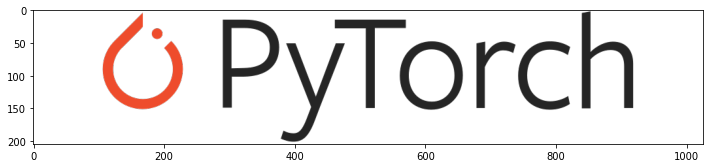

In [ ]:
# Swap the Red and Blue color channels using: cv2.COLOR_BGRA2RGBA.
logo_img = cv2.cvtColor(logo_img, cv2.COLOR_BGRA2RGBA)

# Display the image.
plt.figure(figsize = (12, 12))
plt.imshow(logo_img);

# 2. Splitting and Merging Color Channels

Let's now learn how to split and merge color channels using the **`split()`** and **`merge()`** functions in OpenCV. 

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

**`split()`** Divides a multi-channel array into several single-channel arrays.

**`merge()`** Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

### <font color="green">OpenCV Documentation</font>

[**`split()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a)
[**`merge()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga61f2f2bde4a0a0154b2333ea504fab1d)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

In the example below, we will read an image, split the color channels and plot the individual color channels of the grayscale image to better understand how the individual channels contribute to the color in the original image.

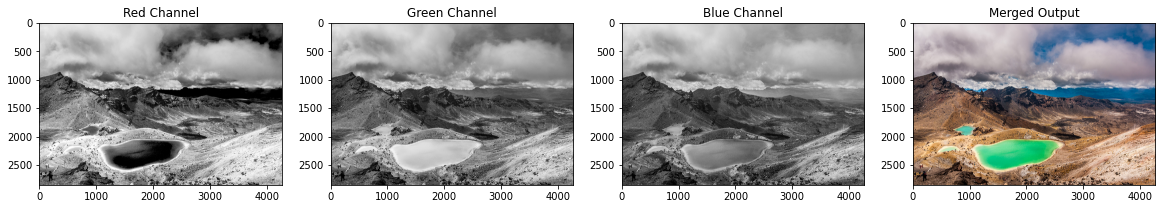

In [ ]:
# Split the image into the B,G,R components.
img_bgr = cv2.imread('Emerald_Lakes_New_Zealand.jpg', cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_bgr)

# Show the channels.
plt.figure(figsize = [20, 10])
# If some area does not contain color (here RED), this are will be scalable to black
plt.subplot(141); plt.imshow(r); plt.title('Red Channel') 
plt.subplot(142); plt.imshow(g); plt.title('Green Channel')
plt.subplot(143); plt.imshow(b); plt.title('Blue Channel')

# Merge the individual channels into a BGR image.
imgMerged = cv2.merge((r, g, b))

# Display the merged output.
plt.subplot(144)
plt.imshow(imgMerged)
plt.title('Merged Output');

# 3. Converting to Different Color Spaces


## 3.1 Background on Color Spaces

In simple terms, a color space is a specific organization of colors that typically represents the space of all possible human-perceivable colors. A color model is a mathematical construct for how to specify colors in the color space with a unique tuple of numbers (typically as three or four values representing the relative contributions of color components). A color model can be thought of as a mathematical way to navigate a color space. However, it is very common to use the term “color space” to collectively define both a color model along with a specific mapping of that model onto an absolute color space.

As an introduction to color spaces we will consider two commonly used models: the RGB color space (for Red, Green, Blue) and the HSV color space (for Hue, Saturation, Value). Both color spaces use a three-dimensional coordinate system to specify the component colors that represent a unique tuple, and therefore a unique color. These components are also referred to as color channels. Since color images are typically represented by three color channels as 8-bit unsigned integers for each channel, the individual color components can take on values from [0,255]. So we can therefore represent 16.77 Million unique colors in either color space (256 * 256 * 256).

In the examples below, we will be working with color images in RGB and HSV.

## 3.2 Changing to HSV Color Space

We can also use **`cvtColor()`** to convert from one color space to another. In the example below, we will convert the image data to the HSV color space, split the channels, and display the individual channels as grayscale images.

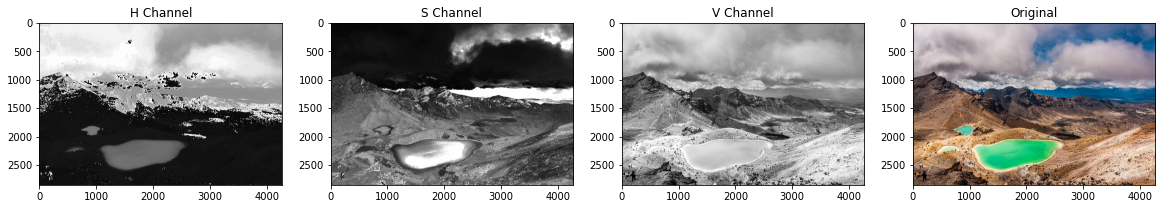

In [ ]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components.
h, s, v = cv2.split(img_hsv)

# Display the channels.
# HSV - hue, saturation, value (odcień, nasycenie, wartość)
# H - 
# S - as much color area is saturated as this area is whiter.
# V - how much area is black or white. If the area is lighter then the final area on the image will be whiter.
plt.figure(figsize = [20, 5])
plt.subplot(141); plt.imshow(h); plt.title('H Channel')
plt.subplot(142); plt.imshow(s); plt.title('S Channel')
plt.subplot(143); plt.imshow(v); plt.title('V Channel')

# Display the original image.
plt.subplot(144); plt.imshow(img_bgr[:, :, ::-1]); plt.title('Original');

## 3.3 Modifying Individual Color Channels

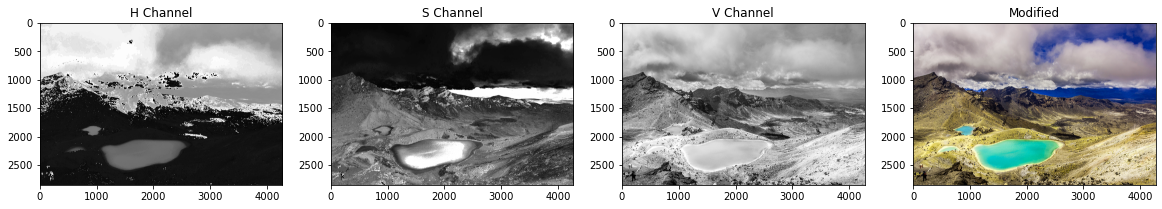

In [ ]:
h_new = h + 10
img_hsv_merged = cv2.merge((h_new, s, v))
img_rgb_merged = cv2.cvtColor(img_hsv_merged, cv2.COLOR_HSV2RGB)

# Display the channels.
plt.figure(figsize = [20,5])
plt.subplot(141); plt.imshow(h_new); plt.title('H Channel')
plt.subplot(142); plt.imshow(s); plt.title('S Channel')
plt.subplot(143); plt.imshow(v); plt.title('V Channel')

# Display the modified image.
plt.subplot(144); plt.imshow(img_rgb_merged); plt.title('Modified');

# 4. Saving Images [recap]

<hr   style="border:none; height: 4px; background-color: #D3D3D3 " />

Saving images using OpenCV is very straightforward using the function **`imwrite()`**. The function saves the image to the specified file. The image format is chosen based on the filename extension (see **`imread()`** for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation below for further details).

	
### <font color="green">Function Syntax </font>
``` python
cv2.imwrite(filename, img[, params])
```

The function has **2 required arguments**:

1. `filename`: This can be an absolute or a relative path. 
2. `img`: Image or Images to be saved.

### <font color="green">OpenCV Documentation</font>

[**`imwrite()`**](https://docs.opencv.org/4.5.2/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce)
[**`imwriteFlags()`**](https://docs.opencv.org/4.5.2/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac)

<hr   style="border:none; height: 4px; background-color: #D3D3D3 " />